# Machine learning, a tutorial, part I

## 1-0 Sunmary
In this tutorial, Spaceship Titanic dataset is being used.
The goal is building good machine learning models to PREDITCT the whether a passenger is being transported successfully.



## 1-1: What is machine learning?

## 1-2: Data type and feature engineering

In [1]:
## import packages
import pandas as pd
import numpy as np

## some setting for better reading experience
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.4f' % x)

##  
randomState = 8

In [2]:
## read data 
space = pd.read_csv("data/train.csv").sample(frac=1, random_state=randomState).reset_index(drop=True)

space_test = space[6000:]
space = space[:6000]

## a quick peek
space.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,6482_03,Mars,True,F/1237/S,TRAPPIST-1e,7.0000,False,0.0000,0.0000,0.0000,0.0000,0.0000,Nutch Letie,True
1,1378_02,Earth,False,F/275/P,TRAPPIST-1e,22.0000,False,926.0000,0.0000,0.0000,0.0000,78.0000,Ellena Caineson,True
2,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0000,False,0.0000,985.0000,0.0000,5.0000,0.0000,Hilip Grifford,True
3,2778_02,Mars,True,F/576/P,55 Cancri e,53.0000,False,NaN,0.0000,0.0000,0.0000,0.0000,Yogal Fisty,True
4,0820_01,Earth,False,F/154/S,55 Cancri e,15.0000,False,0.0000,59.0000,714.0000,0.0000,3.0000,Hanry Strongers,True


### File and Data Field Descriptions

* train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.




In [3]:
## data types in machine learning (or statistics)
## https://en.wikipedia.org/wiki/Statistical_data_type

## data types in python(pandas) 
## object ~ categorical
## float/int ~ numeric
space.dtypes

##

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

### Table & Descriptive Statistics


In [4]:
## describe method offers a simple statitical overview(for numeric columns, by default)
space.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,5877.0000,5877.0000,5879.0000,5844.0000,5870.0000,5868.0000
mean,28.7606,223.8763,452.4528,180.1608,309.2833,302.3246
std,14.3841,639.2248,1599.9579,639.3997,1174.0752,1168.0836
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,19.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,27.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,38.0000,48.0000,73.0000,31.0000,55.0000,44.0000
max,79.0000,8586.0000,27723.0000,23492.0000,22408.0000,24133.0000


In [5]:
## to have one for categorical colunmns
space.describe(include=['object'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,6000,5861,5857,5873,5879,5854,5858
unique,6000,3,2,4841,3,2,5848
top,6482_03,Earth,False,C/137/S,TRAPPIST-1e,False,Sharie Gallenry
freq,1,3191,3770,7,4060,5710,2


In [6]:
## Correlation matrix
space.corr()


/var/folders/rf/tj9nrq4j6cq188kpkxwtsb7w0000gn/T/ipykernel_47310/3535266065.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  space.corr()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.0000,0.0738,0.1212,0.0280,0.1244,0.0924,-0.0856
RoomService,0.0738,1.0000,-0.0127,0.0470,-0.0006,-0.0121,-0.2461
FoodCourt,0.1212,-0.0127,1.0000,-0.0175,0.2285,0.2605,0.0366
ShoppingMall,0.0280,0.0470,-0.0175,1.0000,0.0272,0.0005,0.0056
Spa,0.1244,-0.0006,0.2285,0.0272,1.0000,0.1586,-0.2188
VRDeck,0.0924,-0.0121,0.2605,0.0005,0.1586,1.0000,-0.2033
Transported,-0.0856,-0.2461,0.0366,0.0056,-0.2188,-0.2033,1.0000


In [7]:
## With this tool, we can have a quick overview about the relationships between variables
## Are those variables having small coefficients with Transported should be excluded from model?
## What is correlation in statistics?
## What is correlation in real world?


### Categorical variable: HomePlanet

In [8]:
## From the description:
## HomePlanet - 
## The planet the passenger departed from, typically their planet of permanent residence.

space.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,6482_03,Mars,True,F/1237/S,TRAPPIST-1e,7.0000,False,0.0000,0.0000,0.0000,0.0000,0.0000,Nutch Letie,True
1,1378_02,Earth,False,F/275/P,TRAPPIST-1e,22.0000,False,926.0000,0.0000,0.0000,0.0000,78.0000,Ellena Caineson,True
2,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0000,False,0.0000,985.0000,0.0000,5.0000,0.0000,Hilip Grifford,True
3,2778_02,Mars,True,F/576/P,55 Cancri e,53.0000,False,NaN,0.0000,0.0000,0.0000,0.0000,Yogal Fisty,True
4,0820_01,Earth,False,F/154/S,55 Cancri e,15.0000,False,0.0000,59.0000,714.0000,0.0000,3.0000,Hanry Strongers,True


In [9]:
## A quick look

space.value_counts("HomePlanet")

HomePlanet
Earth     3191
Europa    1451
Mars      1219
dtype: int64

### Categorical variable: PassengerId

In [10]:
## the operations can be applied on object/float are different
space.sort_values("PassengerId").head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
359,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0000,False,109.0000,9.0000,25.0000,549.0000,44.0000,Juanna Vines,True
2263,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0000,True,43.0000,3576.0000,0.0000,6715.0000,49.0000,Altark Susent,False
3372,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0000,False,0.0000,1283.0000,371.0000,3329.0000,193.0000,Solam Susent,False
5475,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0000,False,303.0000,70.0000,151.0000,565.0000,2.0000,Willy Santantines,True
3527,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0000,False,42.0000,1539.0000,3.0000,0.0000,0.0000,Billex Jacostaffey,True


In [11]:
## From the description:
## PassengerId - 
## A unique Id for each passenger. 
## Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with 
## and pp is their number within the group. 
## People in a group are often family members, but not always.

## it seems to be that the first few row are close to each other, but we don't have a proper operation to show this

print(space.loc[2263, "PassengerId"])
print(space.loc[3372, "PassengerId"])

space.loc[2263, "PassengerId"] - space.loc[3372, "PassengerId"]


0003_01
0003_02


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [12]:
## And this is non-sense......

space.loc[2263, "PassengerId"] == space.loc[3372, "PassengerId"]

##

False

### Numeric variable: How to use it?

In [13]:
## From the description:
## RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - 
## Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

space.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,6482_03,Mars,True,F/1237/S,TRAPPIST-1e,7.0000,False,0.0000,0.0000,0.0000,0.0000,0.0000,Nutch Letie,True
1,1378_02,Earth,False,F/275/P,TRAPPIST-1e,22.0000,False,926.0000,0.0000,0.0000,0.0000,78.0000,Ellena Caineson,True
2,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0000,False,0.0000,985.0000,0.0000,5.0000,0.0000,Hilip Grifford,True
3,2778_02,Mars,True,F/576/P,55 Cancri e,53.0000,False,NaN,0.0000,0.0000,0.0000,0.0000,Yogal Fisty,True
4,0820_01,Earth,False,F/154/S,55 Cancri e,15.0000,False,0.0000,59.0000,714.0000,0.0000,3.0000,Hanry Strongers,True


In [14]:
## Keep this in mind first: 
## You should make both numeric and catogorical variables NUMERIC
## Someone may cover you for that in the future
## But you have to deal with it now by yourself

## What's so difficult to make a numeric variable NUMERIC???????
## to describe a numeric column first

space.RoomService.describe()

## Remember there are 6000 rows in the training set
## but in the description:
## count   5877.0000??????



count   5877.0000
mean     223.8763
std      639.2248
min        0.0000
25%        0.0000
50%        0.0000
75%       48.0000
max     8586.0000
Name: RoomService, dtype: float64

In [ ]:
## there are 123 rows with an "NaN"......
space.RoomService.isna().value_counts()

## what is "NaN" ?
## https://zh.wikipedia.org/zh-tw/NaN


In [16]:
## In a numeric variable, there are some "not a number" values......

print(4 + 3.45)
print(4 * 3.45)
print(np.nan * 3.45)

7.45
13.8
nan


In [17]:
## How to deal with it?

## 1. Drop the rows with NaN
space.dropna()

## 4566 rows × 14 columns
## ......drop 1/4 data.............
## maybe not a good idea......
## https://en.wikipedia.org/wiki/Selection_bias


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,6482_03,Mars,True,F/1237/S,TRAPPIST-1e,7.0000,False,0.0000,0.0000,0.0000,0.0000,0.0000,Nutch Letie,True
1,1378_02,Earth,False,F/275/P,TRAPPIST-1e,22.0000,False,926.0000,0.0000,0.0000,0.0000,78.0000,Ellena Caineson,True
4,0820_01,Earth,False,F/154/S,55 Cancri e,15.0000,False,0.0000,59.0000,714.0000,0.0000,3.0000,Hanry Strongers,True
5,3958_01,Mars,False,F/747/S,TRAPPIST-1e,41.0000,False,1144.0000,12.0000,14.0000,22.0000,0.0000,Bun Sau,False
6,4535_01,Earth,False,F/934/P,TRAPPIST-1e,20.0000,False,631.0000,93.0000,0.0000,0.0000,0.0000,Randa Cardners,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,8317_01,Earth,False,F/1710/P,55 Cancri e,18.0000,False,2.0000,83.0000,576.0000,37.0000,0.0000,Olgary Rocknight,False
5995,4741_01,Mars,True,F/961/P,TRAPPIST-1e,35.0000,False,0.0000,0.0000,0.0000,0.0000,0.0000,Wheal Bau,True
5996,6192_01,Earth,False,F/1183/S,PSO J318.5-22,23.0000,False,0.0000,126.0000,403.0000,0.0000,21.0000,Arllia Nolds,True
5997,5764_01,Earth,False,F/1100/S,TRAPPIST-1e,25.0000,False,0.0000,0.0000,1037.0000,8.0000,1.0000,Shery Nolds,True


In [18]:
## 2. assign a TRUE numeric value to NaN values?
print(space.RoomService.head())

## with fillna, any value can be specified to replace the NaN in columns
space.RoomService.fillna(99999999).head()


0     0.0000
1   926.0000
2     0.0000
3        NaN
4     0.0000
Name: RoomService, dtype: float64


0          0.0000
1        926.0000
2          0.0000
3   99999999.0000
4          0.0000
Name: RoomService, dtype: float64

In [19]:
## What is the proper value to assign?

## In many applications or datasets, some values are common to represent a missing value:
## -1 in natural number variable (e.g. age)
## extreme large number: 9999, 999999999

## in your model, you can choose what value to assign:

## how about average?
print("Fillna with population mean:")
print(space.RoomService.fillna(space.RoomService.mean()).head())

## how about zero?
print("\nFillna with 0:")
print(space.RoomService.fillna(0).head())

## how about the value above?
print("\nFillna with the value above:")
print(space.RoomService.fillna(method="ffill").head())

## .......But, why?

## https://pandas.pydata.org/docs/user_guide/missing_data.html

##

Fillna with population mean:
0     0.0000
1   926.0000
2     0.0000
3   223.8763
4     0.0000
Name: RoomService, dtype: float64

Fillna with 0:
0     0.0000
1   926.0000
2     0.0000
3     0.0000
4     0.0000
Name: RoomService, dtype: float64

Fillna with the value above:
0     0.0000
1   926.0000
2     0.0000
3     0.0000
4     0.0000
Name: RoomService, dtype: float64


### Categorical variable: How to use it?

In [20]:
## encode Regionname into numeric
pd.factorize(space.HomePlanet)

(array([0, 1, 1, ..., 1, 0, 1]),
 Index(['Mars', 'Earth', 'Europa'], dtype='object'))

In [21]:
## assign the "numeric" version to dataset

space["HomePlanet_num"] = pd.factorize(space.HomePlanet)[0]
space.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_num
0,6482_03,Mars,True,F/1237/S,TRAPPIST-1e,7.0000,False,0.0000,0.0000,0.0000,0.0000,0.0000,Nutch Letie,True,0
1,1378_02,Earth,False,F/275/P,TRAPPIST-1e,22.0000,False,926.0000,0.0000,0.0000,0.0000,78.0000,Ellena Caineson,True,1
2,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0000,False,0.0000,985.0000,0.0000,5.0000,0.0000,Hilip Grifford,True,1
3,2778_02,Mars,True,F/576/P,55 Cancri e,53.0000,False,NaN,0.0000,0.0000,0.0000,0.0000,Yogal Fisty,True,0
4,0820_01,Earth,False,F/154/S,55 Cancri e,15.0000,False,0.0000,59.0000,714.0000,0.0000,3.0000,Hanry Strongers,True,1


In [22]:
## another way to encode categorical variable
## one-hot encoding
## https://en.wikipedia.org/wiki/One-hot

pd.get_dummies(space.HomePlanet, prefix="HomePlanet")

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
5995,0,0,1
5996,1,0,0
5997,1,0,0
5998,0,0,1


In [23]:
## concatenate the dummies and dataset

pd.concat([space, pd.get_dummies(space.HomePlanet, prefix="HomePlanet")], axis=1).head()

##

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,6482_03,Mars,True,F/1237/S,TRAPPIST-1e,7.0000,False,0.0000,0.0000,0.0000,0.0000,0.0000,Nutch Letie,True,0,0,0,1
1,1378_02,Earth,False,F/275/P,TRAPPIST-1e,22.0000,False,926.0000,0.0000,0.0000,0.0000,78.0000,Ellena Caineson,True,1,1,0,0
2,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0000,False,0.0000,985.0000,0.0000,5.0000,0.0000,Hilip Grifford,True,1,1,0,0
3,2778_02,Mars,True,F/576/P,55 Cancri e,53.0000,False,NaN,0.0000,0.0000,0.0000,0.0000,Yogal Fisty,True,0,0,0,1
4,0820_01,Earth,False,F/154/S,55 Cancri e,15.0000,False,0.0000,59.0000,714.0000,0.0000,3.0000,Hanry Strongers,True,1,1,0,0


## Your first model: Linear Regression

### Round 1: Linear is all you need

In [24]:
## We already seperate the whole dataset into 2 parts
## the first 6000 rows as space_train
## all the others as space_test
## and you should forget about space_test when training th model

space_train = space 
space_test = space_test

In [25]:
## Scikit-learn 
from sklearn.linear_model import LinearRegression

## Initiate a model with intercept (b_0)
lr_model = LinearRegression(fit_intercept=True)

In [26]:
## select the features
features_in_model = ["Age"]
X = space_train.loc[:, features_in_model]
X["Age"] = X.Age.fillna(X.Age.mean())

## select the prediction target
y = space_train.loc[:, "Transported"]
y = y.replace({True:1, False:0})


## train the Linear regression model with y and X
lr_model.fit(X, y)

LinearRegression()

In [27]:
## The model we just fitted is:
## Transported = b_0 + b_1 * Age

print("b_0 = {:.4f}".format(lr_model.intercept_))
print("b_1 = {:.4f}".format(lr_model.coef_[0]))

## make a prediction
lr_pred_transported = lr_model.intercept_ + X.Age*lr_model.coef_[0]

lr_pred_transported

b_0 = 0.5939
b_1 = -0.0030


0      0.5731
1      0.5285
2      0.4213
3      0.4362
4      0.5493
        ...  
5995   0.4898
5996   0.5255
5997   0.5195
5998   0.5136
5999   0.5255
Name: Age, Length: 6000, dtype: float64

In [28]:
## of course you don't have to do it manually
lr_model.predict(X)

array([0.57310748, 0.5284574 , 0.42129721, ..., 0.51952738, 0.51357404,
       0.52548073])

### Round 2: more features

In [29]:
## Initiate a model with intercept (b_0)
lr_model = LinearRegression(fit_intercept=True)

## select the features
features_in_model = ["Age", "RoomService"]
X = space_train.loc[:, features_in_model]
X["Age"] = X.Age.fillna(X.Age.mean())
X["RoomService"] = X.RoomService.fillna(0)

## select the prediction target
y = space_train.loc[:, "Transported"]
y = y.replace({True:1, False:0})

## train the Linear regression model with y and X
lr_model.fit(X, y)

lr_model.predict(X)

##

array([0.60099472, 0.39195272, 0.48011352, ..., 0.55833077, 0.50693948,
       0.56307121])

### Round 3: Logistic regression

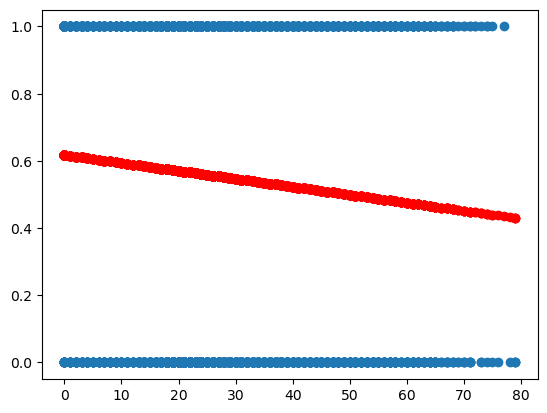

In [30]:
## what is the prediction looks like in a graph?
import matplotlib.pyplot as plt
plt.scatter(X.Age, y)
plt.scatter(X.Age, lr_model.intercept_ + X.Age*lr_model.coef_[0] , color = "red")

##

In [31]:
## Scikit-learn 
from sklearn.linear_model import LogisticRegression

## Initiate a model with intercept (b_0)
lg_model = LogisticRegression(fit_intercept=True)

## the rest remains the same
## select the features
features_in_model = ["Age", "RoomService"]
X = space_train.loc[:, features_in_model]
X["Age"] = X.Age.fillna(X.Age.mean())
X["RoomService"] = X.RoomService.fillna(0)

## select the prediction target
y = space_train.loc[:, "Transported"]
y = y.replace({True:1, False:0})

## train the Linear regression model with y and X
lg_model.fit(X, y)

## the predicted results are no longer "probability" but the "predicted class"
lg_model.predict(X)


array([1, 0, 1, ..., 1, 0, 1])

In [32]:
## the second column will be highly releted to the predicted values of linear regression
lg_model.predict_proba(X)


array([[0.3821778 , 0.6178222 ],
       [0.7582199 , 0.2417801 ],
       [0.49390844, 0.50609156],
       ...,
       [0.42082388, 0.57917612],
       [0.52470993, 0.47529007],
       [0.41647218, 0.58352782]])

## Homework 1
1. So some EDA and data visualization on this data. Share with your pals. Is your story convincing? Is your story implying something helpful to the prediction models? 
2. Try some other model settings, but keep them LogisticRegression().  There are some small tips:
    * different combination of variables
    * use categorical variables (in a good way....)
    * do some operations on numerics variables (like normalization I've mention but not implemented?)
    * deal with the missing values with different ways
    
    